<a href="https://colab.research.google.com/github/soleme/web-ai-hub/blob/main/deep_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # 필요 모듈 가져오기
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
# 데이터 준비
(trainX, trainY), (testX, testY)= tf.keras.datasets.fashion_mnist.load_data()
print(type(trainX))

4431872/4422102 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


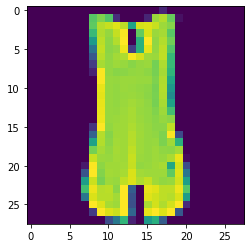

In [ ]:
plt.imshow(trainX[4])

In [ ]:
trainX = trainX.reshape((60000, 28*28))
testX = testX.reshape((10000, 28*28))

print(trainX.shape)

(60000, 784)


In [ ]:
trainX = trainX / 255
testX = testX / 255

In [ ]:
# 모델1 만들기
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(128, activation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


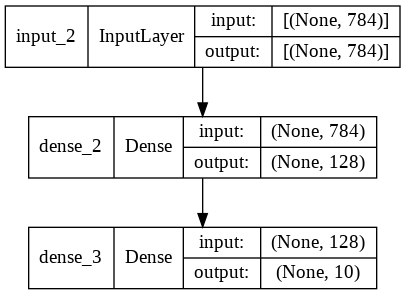

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 학습
hist1 = model.fit(trainX, trainY, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4911 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3651 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3258 - accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3016 - accuracy: 0.8883
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2806 - accuracy: 0.8957


In [ ]:
# 모델 평가
model.evaluate(testX, testY)

313/313 [==============================] - 1s 1ms/step - loss: 0.3339 - accuracy: 0.8781


[0.33387985825538635, 0.8780999779701233]

In [ ]:
preds = model.predict(testX)

In [ ]:
print(preds[0])

[2.66981195e-04 1.60114796e-05 2.83315353e-06 7.48152661e-06
 2.46852378e-05 4.84436937e-02 2.13362946e-05 1.11110725e-01
 2.61618752e-05 8.40080082e-01]


In [ ]:
print(np.argmax(preds[0]))

9


In [ ]:
print(testY[0])

9


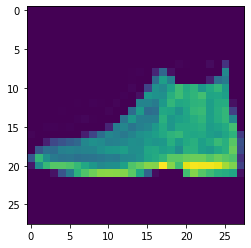

In [ ]:
plt.imshow(testX[0].reshape(28,28))
plt.show()

In [ ]:
## 모델 2

In [ ]:
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish')(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


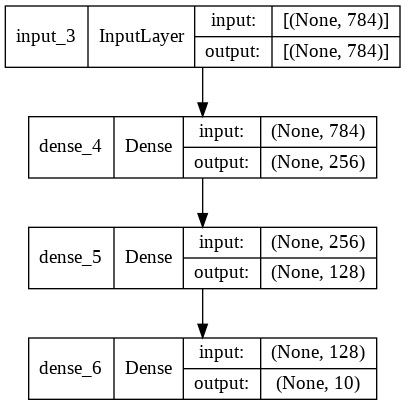

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist2 = model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4624 - accuracy: 0.8306
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3410 - accuracy: 0.8731
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3026 - accuracy: 0.8865
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2770 - accuracy: 0.8965
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2552 - accuracy: 0.9032
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2395 - accuracy: 0.9078
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - accuracy: 0.9145
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2103 - accuracy: 0.9189
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1985 - accuracy: 0.9251
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.189

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8863


[0.382568895816803, 0.8863000273704529]

In [ ]:
preds = model.predict(testX)
print(preds[1])

[3.9574894e-05 8.5897577e-14 9.9975604e-01 3.7554290e-11 1.7108857e-04
 4.7755515e-18 3.3242555e-05 1.2185185e-15 1.1489644e-11 6.8335034e-14]


In [ ]:
print(np.argmax(preds[2]))

1


1


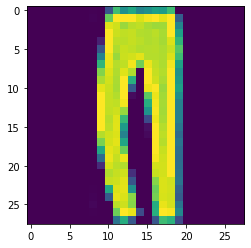

In [ ]:
print(testY[2])
plt.imshow(testX[2].reshape(28,28))
plt.show()

In [ ]:
X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish', )(X)
dropout = tf.keras.layers.Dropout(rate=0.5)(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
dropout = tf.keras.layers.Dropout(rate=0.5)(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(trainX, trainY, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4672 - accuracy: 0.8311
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3447 - accuracy: 0.8722
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3034 - accuracy: 0.8852
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2786 - accuracy: 0.8948
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2592 - accuracy: 0.9010
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2422 - accuracy: 0.9077
Epoch 7/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2246 - accuracy: 0.9148
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2125 - accuracy: 0.9190
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2000 - accuracy: 0.9229
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.188

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8875


[0.3652433454990387, 0.887499988079071]